# Moist GCM with a convective parameterisation
-------

Here, CliMT is configured as a simple moist GCM with a grey radiation scheme and
the simple physics package (Reed and Jablonowski (2012)) to provide surface fluxes, a
boundary layer, and the Emanuel convection scheme.

The GCM generates a weak circulation, but the vertical profiles of moisture and temperature
adjust quickly due to the presence of convection. The weak circulation is a consequence
of no water vapour sensitivity in the radiation scheme.

In [1]:
%matplotlib notebook

from climt.dynamics import dynamics
from climt.simple_physics_custom import simple_physics_custom
from climt.federation import federation
import climt

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid',rc={'grid.linestyle':'dotted', 'grid.color':'0.0'})
# Dynamical core parameters
import matplotlib as mpl

global_time_step = 300.

kwargs = {}
kwargs['dt'] = global_time_step
kwargs['nlon'] = 96
kwargs['nlat'] = 44

#Init the dynamics Component
dycore = dynamics(scheme='gfs', **kwargs)

#Get the pressure and lat/lon values
pressure = dycore['p']
ps = dycore['ps']

full_latitudes = dycore.Extension.latitudes
full_longitudes = dycore.Extension.longitudes

dycore_grid = dycore.Grid

Using netCDF4 interface for IO
Lats, lons, levs, trunc, dims, tracers 44 96 28 30 496 1


In [2]:
#Setup simple physics

kwargs['grid'] = dycore_grid
kwargs['dt'] = global_time_step
kwargs['p'] = pressure
kwargs['pint'] = dycore['pint']
kwargs['use_ext_ts'] = True
kwargs['lsc'] = False
#set surface temperatures
eq_pole_temp_gradient = 20.
max_temp = 300.

delta = eq_pole_temp_gradient/max_temp

Ts = 300*(1 - delta*np.sin(full_latitudes)**2)

kwargs['Ts'] = Ts

phys = simple_physics_custom(**kwargs)

#Initialise radiation
kwargs = {}
#kwargs['UpdateFreq'] = 3600.
kwargs['grid'] = dycore_grid

rad = climt.radiation(scheme='newgreygas', **kwargs)

#Initialise convection
kwargs = {}
kwargs['grid'] = dycore_grid
kwargs['dt'] = global_time_step

conv = climt.convection(scheme='emanuelnew', **kwargs)

Finished initialising emanuel convection scheme


gfs_dynamics  can integrate  ['U', 'V', 'T', 'q', 'ps']
All fields integrated by federation members:  ['U', 'V', 'T', 'q', 'ps']
All fields returned by federation members:  ['U', 'V', 'T', 'q', 'ps', 'p', 'pint']


<IPython.core.display.Javascript object>


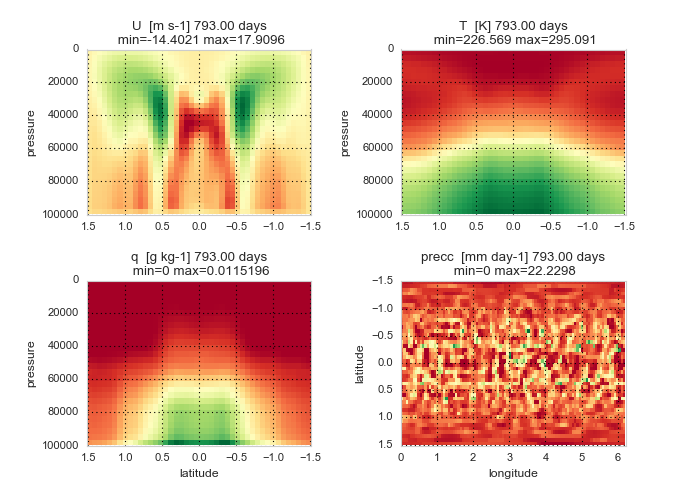

In [3]:
#Setup federation
kwargs = {}
kwargs['Ts'] = Ts
kwargs['MonitorFields'] = ['U','T','q','precc'] # Display zonal velocity during simulation
kwargs['MonitorFreq'] = 3600.*6 #6 hourly update
kwargs['grid'] = dycore_grid

fed = federation(dycore, rad, phys, conv, **kwargs)
#Run the code for 10 days. each time step is 1200 seconds = 1/3 hour
num_steps = 1000*24*12
for i in range(num_steps):
    #Integrate one time step
    fed.step()

In [ ]:
del(dycore)
del(fed)